<a href="https://colab.research.google.com/github/Hebah19/CodSoft/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle



In [ ]:
!mkdir -p ~/.kaggle  #creating folder for kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

100% 201M/202M [00:08<00:00, 28.5MB/s]
100% 202M/202M [00:08<00:00, 23.8MB/s]


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve
import joblib
from zipfile import ZipFile

**loading data to panda dataframe**

In [ ]:
# extracting the compressed data set
from zipfile import ZipFile
dataset = 'fraud-detection.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset as extracted')

the dataset as extracted


In [ ]:
Train_df = pd.read_csv('/content/fraudTrain.csv')
Train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
Train_df.shape

(1296675, 23)

In [ ]:
Test_df = pd.read_csv('/content/fraudTest.csv')
Test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
Test_df.shape

(555719, 23)

In [ ]:
df = pd.concat([Train_df, Test_df])
df.shape

(1852394, 23)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Dropping irrelevant features**

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
New_df =df.drop(['Unnamed: 0','merchant','first','last','street','city','dob','city_pop'], axis =1)
New_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,zip,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,NC,28654,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,ID,83252,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
New_df.shape

(1852394, 15)

In [ ]:
New_df.describe()

,cc_num,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**Finding Missing Values**

In [ ]:
New_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
category                 0
amt                      0
gender                   0
state                    0
zip                      0
lat                      0
long                     0
job                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Data Visualization**

In [ ]:
New_df['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

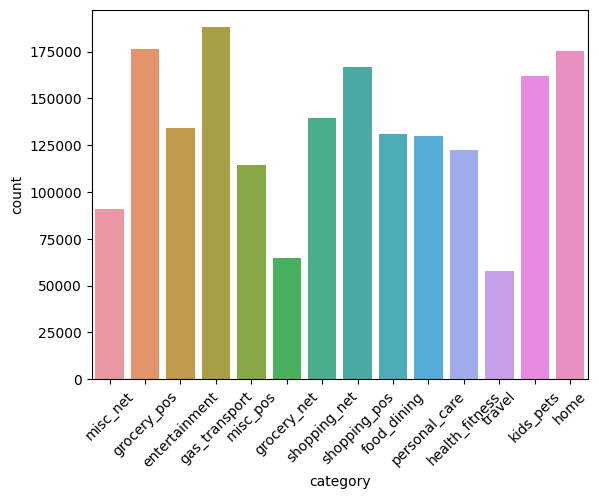

In [ ]:
category =sns.countplot(x='category', data = New_df)
plt.xticks(rotation=45)

In [ ]:
New_df['state'].value_counts()

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

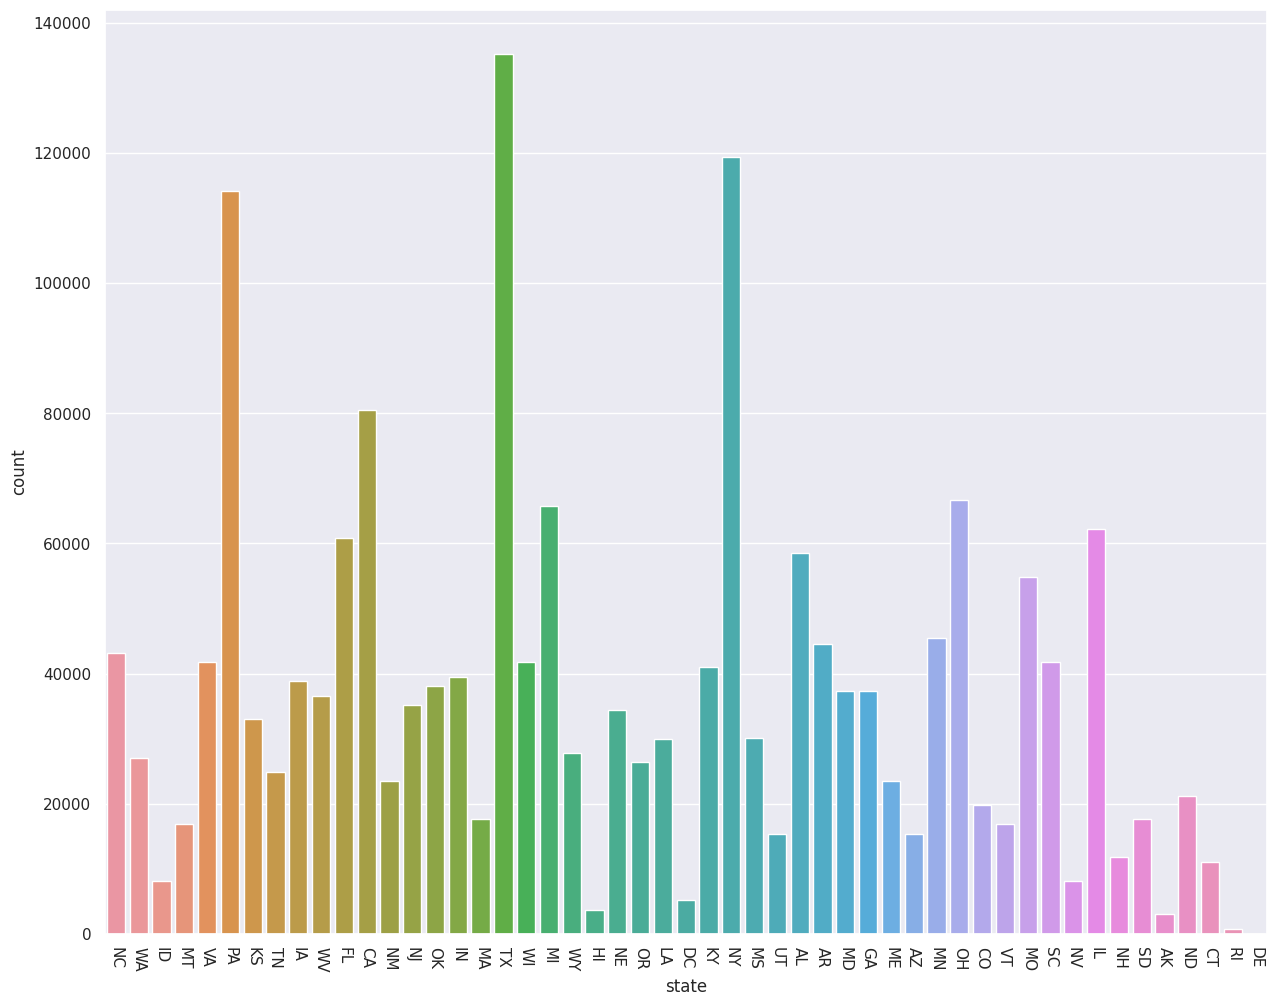

In [ ]:
sns.countplot(x ='state', data = New_df)
plt.xticks(rotation=270)
sns.set(rc={'figure.figsize':(15,12)})

In [ ]:
gender= New_df['gender'].value_counts()
print (gender)

F    1014749
M     837645
Name: gender, dtype: int64


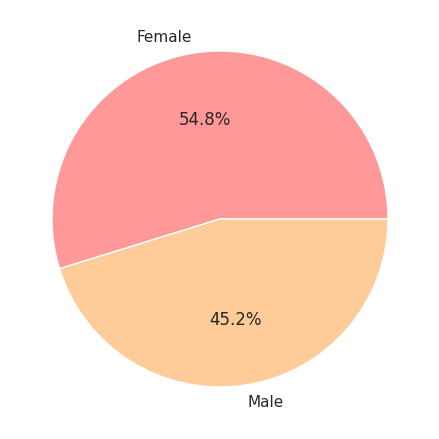

In [ ]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,0.35,0.35])
colors =[ '#ff9999', '#ffcc99']
labels = ['Female','Male']
ax.pie(gender, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

In [ ]:
New_df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [ ]:
New_df['job'].value_counts()

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: job, Length: 497, dtype: int64

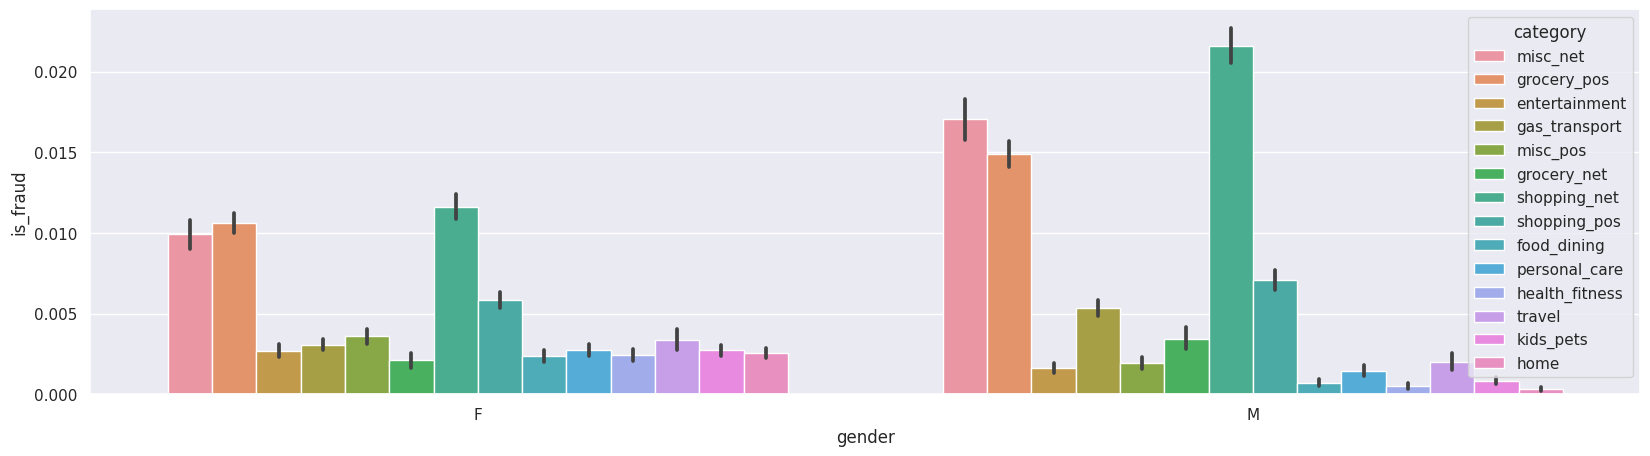

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x= 'gender', y = 'is_fraud', hue = 'category', data = New_df)
plt.show()

In [ ]:
fraud =New_df['is_fraud'].value_counts()
print(fraud) # 1 rep fraud

0    1842743
1       9651
Name: is_fraud, dtype: int64


<Axes: xlabel='is_fraud', ylabel='count'>

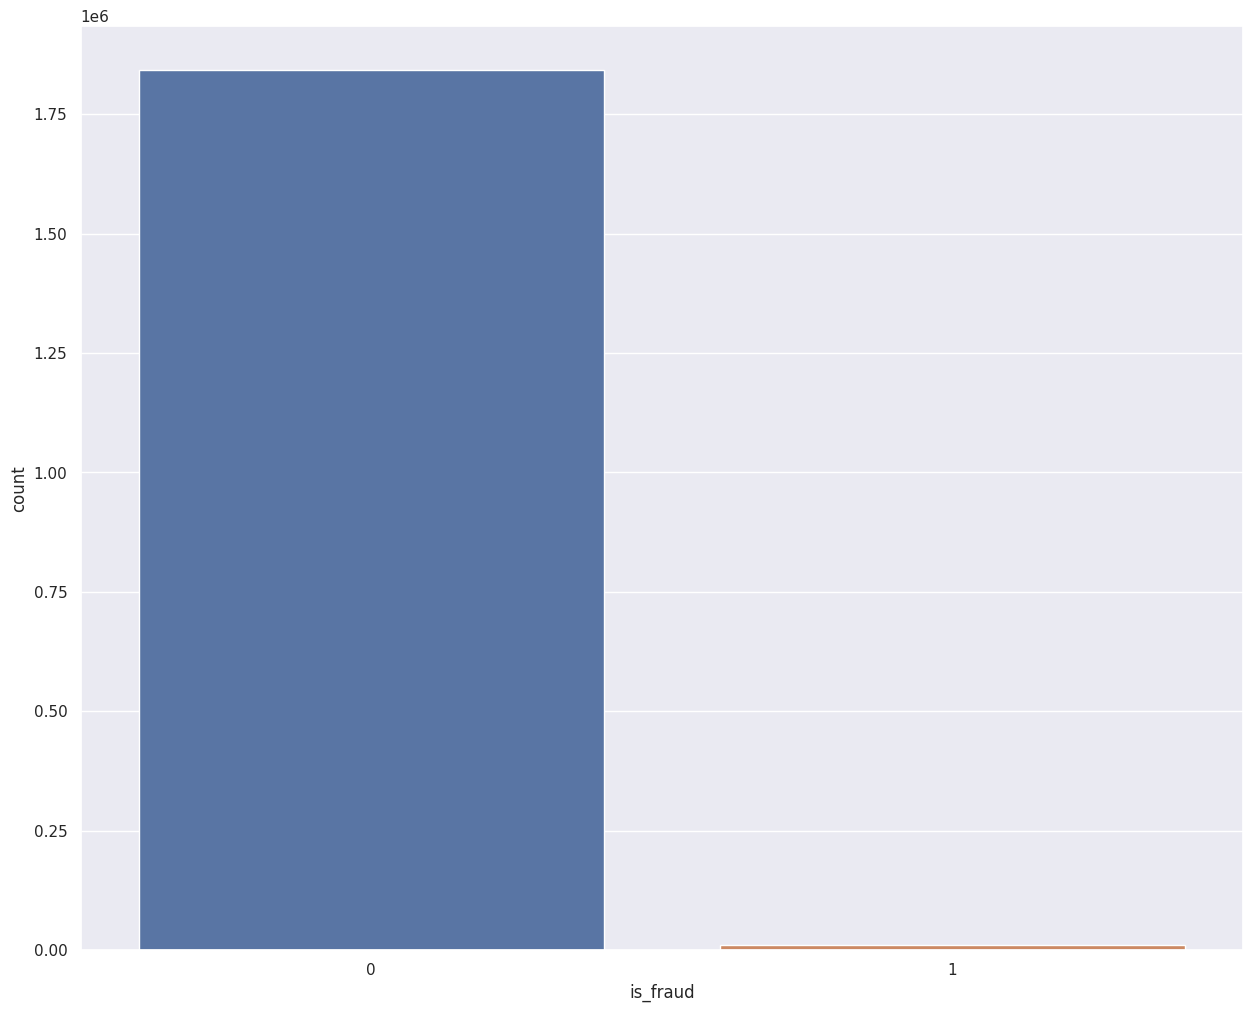

In [ ]:
sns.countplot(x = 'is_fraud',data = New_df)

**Handling Imbalance data**

In [ ]:
# seperating the features
not_fraud = New_df[New_df.is_fraud==0]
fraud = New_df[New_df.is_fraud==1]
print(not_fraud.shape, fraud.shape)

(1842743, 15) (9651, 15)


In [ ]:
# under sampling
new_not_fraud = not_fraud.sample(n=9700)
print(new_not_fraud.shape,fraud.shape)

(9700, 15) (9651, 15)


In [ ]:
# concatenate 2 dataframes
Balance_df = pd.concat([new_not_fraud,fraud], axis =0)
print(Balance_df.shape)

(19351, 15)


In [ ]:
Balance_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,zip,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
616382,2019-09-19 05:42:00,4247921790666,grocery_pos,74.84,F,OH,43160,39.5370,-83.4550,Television floor manager,6433aa00d47188771bcb81dab943f044,1348033320,40.235020,-83.031233,0
927941,2020-01-03 09:51:36,370818583810103,gas_transport,63.91,M,PA,15557,39.9373,-79.1865,General practice doctor,f9f0916ba42ed76a2b468c788c08e29b,1357206696,40.118252,-79.102024,0
501512,2020-12-20 09:18:30,4060579726528237,shopping_net,3.15,M,KS,66070,39.2136,-95.4404,Theatre director,36fe99ca7ba5ab9003ba606aa46ea42b,1387531110,38.718886,-94.814470,0
66801,2019-02-09 14:16:25,3529597810116815,shopping_pos,6.19,F,PA,17060,40.4679,-77.8967,Archaeologist,f3aa80ad469e21fb7dffd13ef0062680,1328796985,41.106542,-77.950573,0
45326,2019-01-27 22:41:14,6011109736646996,kids_pets,38.31,F,NC,28405,34.2651,-77.8670,English as a second language teacher,0b08b8b4aa839737615eafefa0e3a279,1327704074,34.579342,-77.788843,0


In [ ]:
Balance_df.tail() #print last 5 rows

,trans_date_trans_time,cc_num,category,amt,gender,state,zip,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
517197,19162,415,12,13195,1,25,391,234,423,119,3960,19162,4537,8399,1
517274,19163,415,12,11325,1,25,391,234,423,119,16516,19163,4014,8080,1
517341,19164,415,11,13181,1,25,391,234,423,119,2761,19164,4603,8146,1
517529,19166,415,4,7610,1,25,391,234,423,119,3364,19166,4697,8070,1
517571,19167,415,8,10280,1,25,391,234,423,119,5075,19167,3659,7914,1


In [ ]:
# convert the 'Date' column to datetime format
Balance_df['trans_date_trans_time']= pd.to_datetime(Balance_df['trans_date_trans_time'])
year =Balance_df['trans_date_trans_time'].dt.year.value_counts()
print(year)

2019    10103
2020     9248
Name: trans_date_trans_time, dtype: int64


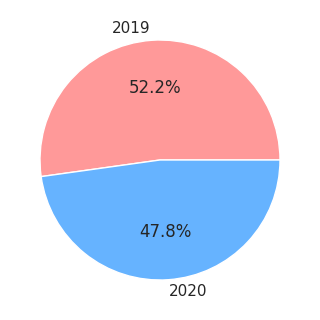

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,0.25,0.25])
colors =[ '#ff9999','#66b3ff']
labels = ['2019','2020']
ax2.pie(year, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

**Data Encoding**

In [ ]:
Balance_df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'state',
       'zip', 'lat', 'long', 'job', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# load the label encoder function
label_encode = LabelEncoder()

In [ ]:
for col in Balance_df.columns:
    Balance_df[col]= label_encode.fit_transform(Balance_df[col])
Balance_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,zip,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
616382,6880,96,4,4473,0,35,439,499,605,461,7667,6880,11184,12192,0
927941,10129,351,2,3932,1,38,143,538,772,210,18900,10129,10957,15202,0
501512,19076,653,11,205,1,16,692,476,280,465,4061,19076,8477,5944,0
66801,997,509,12,495,0,38,169,584,800,30,18445,997,12937,15769,0
45326,616,826,7,2574,0,27,264,213,802,178,814,616,4545,15866,0


**Data Standardization**

In [ ]:
# split into target and feature value
x = Balance_df.drop(columns ='is_fraud', axis = 1)
y = Balance_df['is_fraud']

In [ ]:
print(x)
print(y)

        trans_date_trans_time  cc_num  category    amt  gender  state  zip  \
616382                   6880      96         4   4473       0     35  439   
927941                  10129     351         2   3932       1     38  143   
501512                  19076     653        11    205       1     16  692   
66801                     997     509        12    495       0     38  169   
45326                     616     826         7   2574       0     27  264   
...                       ...     ...       ...    ...     ...    ...  ...   
517197                  19162     415        12  13195       1     25  391   
517274                  19163     415        12  11325       1     25  391   
517341                  19164     415        11  13181       1     25  391   
517529                  19166     415         4   7610       1     25  391   
517571                  19167     415         8  10280       1     25  391   

        lat  long  job  trans_num  unix_time  merch_lat  merch_

In [ ]:
scaler = StandardScaler()
x_stand = scaler.fit_transform(x)
print(x_stand)

[[-0.50000202 -1.39847171 -0.70595403 ... -0.50000202  0.27102729
   0.45106467]
 [ 0.08185235 -0.50973401 -1.2215284  ...  0.08185235  0.23037407
   0.99005943]
 [ 1.68414569  0.54281025  1.09855628 ...  1.68414569 -0.21376682
  -0.66775236]
 ...
 [ 1.69990537 -0.28667827  1.09855628 ...  1.69990537 -0.90755788
  -0.27344457]
 [ 1.70026354 -0.28667827 -0.70595403 ...  1.70026354 -0.89072351
  -0.28705374]
 [ 1.70044263 -0.28667827  0.32519472 ...  1.70044263 -1.07661796
  -0.31498835]]


In [ ]:
x = x_stand

In [ ]:
print(x,y)

[[-0.50000202 -1.39847171 -0.70595403 ... -0.50000202  0.27102729
   0.45106467]
 [ 0.08185235 -0.50973401 -1.2215284  ...  0.08185235  0.23037407
   0.99005943]
 [ 1.68414569  0.54281025  1.09855628 ...  1.68414569 -0.21376682
  -0.66775236]
 ...
 [ 1.69990537 -0.28667827  1.09855628 ...  1.69990537 -0.90755788
  -0.27344457]
 [ 1.70026354 -0.28667827 -0.70595403 ...  1.70026354 -0.89072351
  -0.28705374]
 [ 1.70044263 -0.28667827  0.32519472 ...  1.70044263 -1.07661796
  -0.31498835]] 616382    0
927941    0
501512    0
66801     0
45326     0
         ..
517197    1
517274    1
517341    1
517529    1
517571    1
Name: is_fraud, Length: 19351, dtype: int64


**Splitting into trining and testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)
print (x.shape, x_train.shape, x_test.shape)
print (y.shape, y_train.shape, y_test.shape)

(19351, 14) (15480, 14) (3871, 14)
(19351,) (15480,) (3871,)


**Model Training**

**1) Random Forest Classifer**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

**2) Logistic Regression**

In [ ]:
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

**3)Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

**Model Evaluation**

**For Random Forest Classifier**

In [ ]:
x_test_pred1 = rfc.predict(x_test)
accuracy1 = accuracy_score(y_test, x_test_pred1)
precision1 = precision_score(y_test, x_test_pred1)
recall1 = recall_score(y_test, x_test_pred1)
f1_1 = f1_score(y_test, x_test_pred1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print ("Recall", recall1)
print ("f1:", f1_1)

Accuracy: 0.9504004133298889
Precision: 0.9699842022116903
Recall 0.9317147192716236
f1: 0.9504643962848297


In [ ]:
# Confusion Matrix
cf_matrix1 = confusion_matrix(y_test, x_test_pred1)
print(cf_matrix1)

[[1837   57]
 [ 135 1842]]


In [ ]:
tn,fp,fn,tp= cf_matrix1.ravel()
print(tn,fp,fn,tp)

1837 57 135 1842


Text(28.749999999999993, 0.5, 'Correct Label')

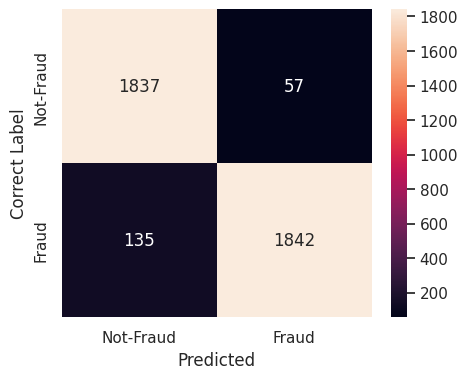

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix1, annot=True, xticklabels=["Not-Fraud","Fraud"],
            yticklabels=["Not-Fraud","Fraud"], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

**Precision-Recall curve for Random Forest Classifier**

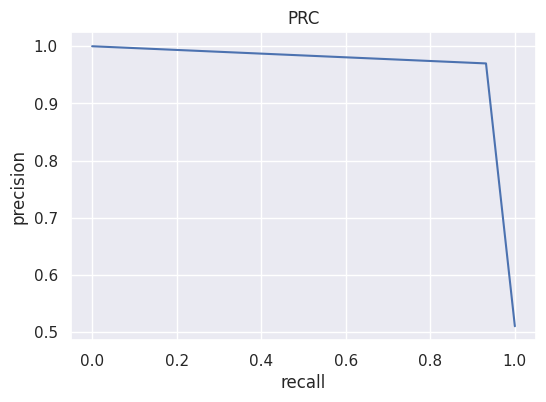

In [ ]:
pr, re, thresholds = precision_recall_curve(y_test, x_test_pred1)
plt.figure(figsize = (6,4))
plt.plot(re,pr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

**For Logistic Regression**

In [ ]:
x_test_pred2 = lg.predict(x_test)
accuracy2 = accuracy_score(y_test, x_test_pred2)
precision2 = precision_score(y_test, x_test_pred2)
recall2 = recall_score(y_test, x_test_pred2)
f1_2 = f1_score(y_test, x_test_pred2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("f1:", f1_2)

Accuracy: 0.8044432963058641
Precision: 0.8362734288864389
Recall: 0.7673242286292362
f1: 0.8003165391717226


In [ ]:
# Confusion Matrix
cf_matrix2 = confusion_matrix(y_test, x_test_pred2)
print(cf_matrix2)
tn1,fp1,fn1,tp1= cf_matrix2.ravel()
print(tn1,fp1,fn1,tp1)

[[1597  297]
 [ 460 1517]]
1597 297 460 1517


Text(28.749999999999993, 0.5, 'Correct Label')

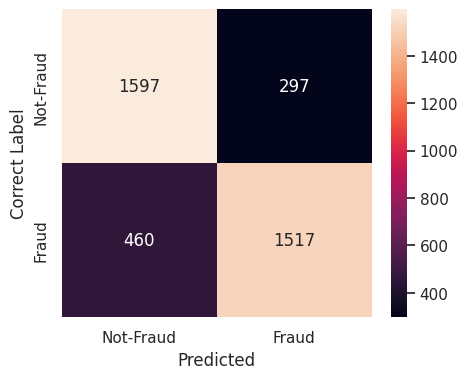

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix2, annot=True, xticklabels=["Not-Fraud","Fraud"],
            yticklabels=["Not-Fraud","Fraud"], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

**Precision-Recall curve for Logistic Regression **

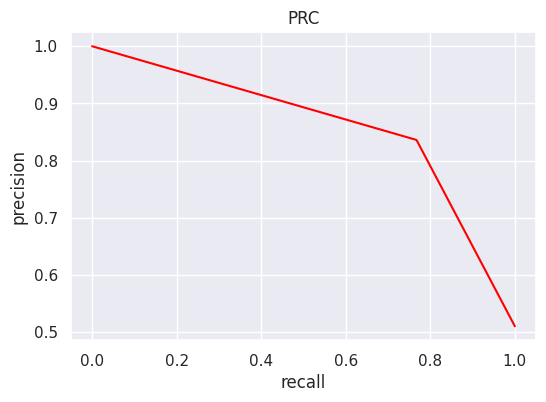

In [ ]:
pr1, re1, thresholds1 = precision_recall_curve(y_test, x_test_pred2)
plt.figure(figsize = (6,4))
plt.plot(re1,pr1, color='red')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

In [ ]:
# For Decision Tree Classification
x_test_pred3 = dtc.predict(x_test)
accuracy3 = accuracy_score(y_test, x_test_pred3)
precision3 = precision_score(y_test, x_test_pred3)
recall3 = recall_score(y_test, x_test_pred3)
f1_3 = f1_score(y_test, x_test_pred3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:",recall3)
print("f1:", f1_3)

Accuracy: 0.9491087574270214
Precision: 0.9564102564102565
Recall: 0.9433485078401619
f1: 0.949834479246244


In [ ]:
# Confusion Matrix
cf_matrix3 = confusion_matrix(y_test, x_test_pred3)
print(cf_matrix3)
tn2,fp2,fn2,tp2= cf_matrix3.ravel()
print(tn2,fp2,fn2,tp2)

[[1809   85]
 [ 112 1865]]
1809 85 112 1865


Text(28.749999999999993, 0.5, 'Correct Label')

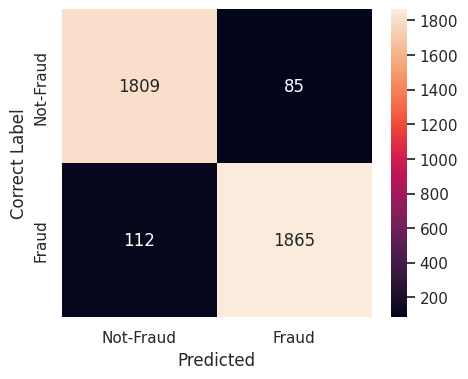

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix3, annot=True, xticklabels=["Not-Fraud","Fraud"],
            yticklabels=["Not-Fraud","Fraud"], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

**Precision-Recall curve for Decision Tree**

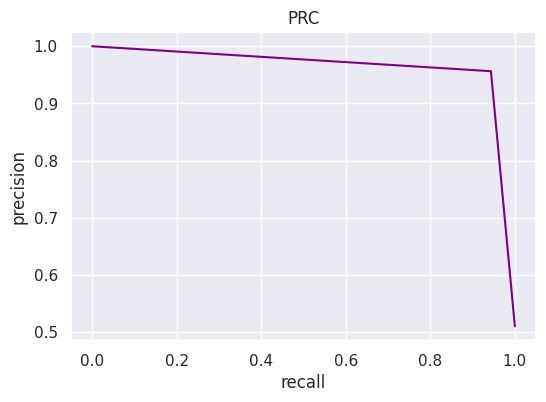

In [ ]:
pr2, re2, thresholds2 = precision_recall_curve(y_test, x_test_pred3)
plt.figure(figsize = (6,4))
plt.plot(re2,pr2, color='purple')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

**Final Data**

In [ ]:
final_data = pd.DataFrame({'Models':['Random Forest Classifer','logestic regression','Decision Tree Classsifier'],'Accuracy':[accuracy1,accuracy2,accuracy3 ],'precision':[precision1,precision2,precision3],'recall':[recall1,recall2,recall3],'f1':[f1_1,f1_2,f1_3]})
print(final_data)

                      Models  Accuracy  precision    recall        f1
0    Random Forest Classifer  0.950400   0.969984  0.931715  0.950464
1        logestic regression  0.804443   0.836273  0.767324  0.800317
2  Decision Tree Classsifier  0.949109   0.956410  0.943349  0.949834


**Predictive system**
Random Forest model has a somewhat lower recall than Decision Tree but it has higher accuracy and precision so we use this model.

In [ ]:
joblib.dump(rfc, 'fraud_prediction')

['fraud_prediction']

In [ ]:
model = joblib.load('fraud_prediction')
md = model.predict([[2,1,7,8,3,0,1,4,6,0,3,1,9,7]])
if md ==[1]:
  print('Fraud',md)
if md ==[0]:
  print('Not-Fraud',md)


Not-Fraud [0]
